In [2]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from UTILITIES import read_multiple_json_files
from joblib import dump
import matplotlib.pyplot as plt
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

                                kind  \
0  youtube#videoCategoryListResponse   
1  youtube#videoCategoryListResponse   
2  youtube#videoCategoryListResponse   
3  youtube#videoCategoryListResponse   
4  youtube#videoCategoryListResponse   

                                                etag  \
0  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
1  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
2  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
3  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
4  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   

                                               items  
0  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
1  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
2  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
3  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
4  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
Index(['id', 'title'], dtype='object')


In [3]:
# List of file paths to read:
file_paths = {
    "C:/Users/shrey/OneDrive/Desktop/Thesis/1/US_category_id.json"
}

# Reading and combining multiple files into a single DataFrame
category_json = read_multiple_json_files(file_paths)

# Displays the first 5 rows of the combined DataFrame
category_json.head()
print(category_json.head())

                                kind  \
0  youtube#videoCategoryListResponse   
1  youtube#videoCategoryListResponse   
2  youtube#videoCategoryListResponse   
3  youtube#videoCategoryListResponse   
4  youtube#videoCategoryListResponse   

                                                etag  \
0  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
1  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
2  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
3  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
4  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   

                                               items  
0  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
1  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
2  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
3  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
4  {'kind': 'youtube#videoCategory', 'etag': '"m2...  


In [4]:
# Creating a list of Dictionaries with ID and Category label mapping
category_dict = [{'id': item['id'], 'title': item['snippet']['title']} for item in category_json['items']]

# Creating a DataFrame for the Dictionary
category_df = pd.DataFrame(category_dict)
print(category_df.columns)

Index(['id', 'title'], dtype='object')


In [5]:
# Renaming columns and saving category_df to categories.
categories = category_df.rename(columns={"id": "Category_ID", "title": "Category_Title"})
# Displays the DataFrame containing unique categories
print(categories)

   Category_ID         Category_Title
0            1       Film & Animation
1            2       Autos & Vehicles
2           10                  Music
3           15         Pets & Animals
4           17                 Sports
5           18           Short Movies
6           19        Travel & Events
7           20                 Gaming
8           21          Videoblogging
9           22         People & Blogs
10          23                 Comedy
11          24          Entertainment
12          25        News & Politics
13          26          Howto & Style
14          27              Education
15          28   Science & Technology
16          29  Nonprofits & Activism
17          30                 Movies
18          31        Anime/Animation
19          32       Action/Adventure
20          33               Classics
21          34                 Comedy
22          35            Documentary
23          36                  Drama
24          37                 Family
25          

In [6]:
new_video_df = pd.read_csv('C:/Users/shrey/OneDrive/Desktop/Thesis/3B/Clean_finale.csv')
print(new_video_df)

                                                    Title  Category_ID  \
0                                      want talk marriage           22   
1       trump presidency last week tonight john oliver...           24   
2        racist superman rudy mancuso king bach lele pons           23   
3                             nickelback lyrics real fake           24   
4                                         dare going bald           24   
...                                                   ...          ...   
972273                           survive sun ending world           20   
972274           chandrayaan launch live sriharikota isro           22   
972275  pen parkum function most awaited day kanmani b...           26   
972276  performance itlu mee anjalipavan emotional nee...           24   
972277  radhakrishn raasleela part shalv ka antt radha...           24   

                                                     Tags  \
0                                         shantell

In [7]:
# Assuming you want to drop columns 'Column1' and 'Column2'
columns_to_drop = ['Title', 'Tags', 'Description', 'Category_Name']
new_video_df = new_video_df.drop(columns=columns_to_drop)

In [8]:
new_video_df

,Category_ID,Cleaned Title
0,22,want talk marriage shantells shantell lens dro...
1,24,trump presidency last week tonight john oliver...
2,23,racist superman rudy mancuso king bach lele po...
3,24,nickelback lyric real fake today find link ama...
4,24,dare going bald know since show might episode ...
...,...,...
972273,20,survive sun ending world worldsocial medium qu...
972274,22,chandrayaan launch live sriharikota isro vlog ...
972275,26,pen parkum function awaited day kanmani beauty...
972276,24,performance itlu mee anjali anjalipavan pavan ...


In [9]:
new_video_df.dropna(inplace=True)

In [10]:
# Reset the column numbering
new_video_df.reset_index(drop=True, inplace=True)

In [11]:
new_video_df

,Category_ID,Cleaned Title
0,22,want talk marriage shantells shantell lens dro...
1,24,trump presidency last week tonight john oliver...
2,23,racist superman rudy mancuso king bach lele po...
3,24,nickelback lyric real fake today find link ama...
4,24,dare going bald know since show might episode ...
...,...,...
971539,20,survive sun ending world worldsocial medium qu...
971540,22,chandrayaan launch live sriharikota isro vlog ...
971541,26,pen parkum function awaited day kanmani beauty...
971542,24,performance itlu mee anjali anjalipavan pavan ...


In [12]:
new_video_df.isna().sum()

Category_ID      0
Cleaned Title    0
dtype: int64

In [13]:
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the combined text
counts = vectorizer.fit_transform(new_video_df['Cleaned Title'].values)

# Using Decision Tree Classifier
nb_classifier = MultinomialNB()

output = new_video_df['Category_ID'].values

In [14]:
# Splitting the dataset into features (X) and target (y)
X = counts
y = output

In [15]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np
import joblib

# Assuming your data is stored in X (features) and y (labels)

# Step 1: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Step 2: Split the testing set into test and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test)

# Step 3: Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# Step 4: Initialize a list to store accuracies
accuracies = []

# Step 5: Perform 5-fold stratified cross-validation
for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
    # Your model training code goes here
    # Example:
    nb_classifier.fit(X_train_fold, y_train_fold)
    
    # Your model evaluation code goes here
    # Example:
    y_pred = nb_classifier.predict(X_test_fold)
    
    # Calculate accuracy for this fold
    fold_accuracy = accuracy_score(y_test_fold, y_pred)
    accuracies.append(fold_accuracy)

    # Generate classification report for this fold
    fold_classification_report = classification_report(y_test_fold, y_pred, zero_division=1)
    print("Classification Report (Fold {}):\n".format(len(accuracies)), fold_classification_report)
    
    # Save the trained classifier for this fold
    # Example:
    joblib.dump(nb_classifier, 'model_fold_{}.joblib'.format(len(accuracies)))

Classification Report (Fold 1):
               precision    recall  f1-score   support

           1       0.83      0.79      0.81      4879
           2       0.91      0.93      0.92      2224
          10       0.94      0.94      0.94     20114
          15       0.98      0.58      0.73       651
          17       0.91      0.98      0.94     14050
          19       0.96      0.69      0.80       962
          20       0.89      0.97      0.93     18868
          22       0.78      0.76      0.77     12885
          23       0.85      0.86      0.85      8146
          24       0.89      0.82      0.86     35484
          25       0.85      0.93      0.89      5384
          26       0.77      0.89      0.82      4445
          27       0.95      0.82      0.88      3497
          28       0.91      0.93      0.92      4277
          29       0.65      0.14      0.24        90
          30       1.00      0.00      0.00         3
          43       0.63      0.30      0.40     

In [16]:
# Step 6: Calculate mean accuracy
mean_accuracy = np.mean(accuracies)

print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.8826682155040583


In [17]:
from sklearn.model_selection import train_test_split

# Assuming your data is stored in X (features) and y (labels/targets)
# Replace X and y with your actual data

# Calculate the index to split the data
split_index = int(0.7 * X.shape[0])

# Perform the train-test split using stratified sampling
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)
# Now, X_train and y_train contain the first 70% of the data for training, and X_test and y_test contain the remaining 30% for testing

# Training the Multinomial NB Model based on counts and outputs on the 70% dataset.
nb_classifier.fit(X_train, y_train)

# Get predictions for the validation set
predicted_val = nb_classifier.predict(X_val)

# Get predictions for the test set
predicted_test = nb_classifier.predict(X_test)

# Generate the classification report
# Evaluate the model on the validation set
print("Classification Report - Validation Set:")
report1 = classification_report(Y_val, predicted_val, zero_division=1)
print(report1)

# Evaluate the model on the test set
print("\nClassification Report - Test Set:")
print(classification_report(Y_test, predicted_test, zero_division=1))


# Save the classification report to a file using joblib
joblib.dump(report1, 'classification_report.joblib')

Classification Report - Validation Set:
              precision    recall  f1-score   support

           1       0.83      0.82      0.82      5227
           2       0.91      0.95      0.93      2384
          10       0.95      0.95      0.95     21551
          15       0.94      0.69      0.80       697
          17       0.91      0.98      0.95     15053
          19       0.96      0.77      0.85      1031
          20       0.89      0.97      0.93     20215
          22       0.79      0.78      0.78     13807
          23       0.85      0.87      0.86      8727
          24       0.91      0.82      0.86     38019
          25       0.84      0.93      0.88      5768
          26       0.75      0.90      0.82      4762
          27       0.95      0.85      0.90      3748
          28       0.90      0.94      0.92      4582
          29       0.47      0.09      0.16        97
          30       0.00      0.00      1.00         3
          43       0.47      0.38      0.

['classification_report.joblib']

In [18]:
# Calculate the index to split the data
plit_index = int(0.3 * X.shape[0])

# Perform the train-test split using stratified sampling
X_train, X_temp, y_train, y_temp = train_test_split(X[:plit_index], y[:plit_index],
                                                    test_size=0.7, stratify=y[:plit_index],
                                                    random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)
# Now, X_train and y_train contain the first 70% of the data for training, and X_test and y_test contain the remaining 30% for testing

# Training the Multinomial NB Model based on counts and outputs on the 70% dataset.
nb_classifier.fit(X_train, y_train)

# Get predictions for the validation set
predicted_val = nb_classifier.predict(X_val)

# Get predictions for the test set
predicted_test = nb_classifier.predict(X_test)

# Generate the classification report
# Evaluate the model on the validation set
print("Classification Report - Validation Set:")
report2 = classification_report(Y_val, predicted_val, zero_division=1)
print(report2)

# Evaluate the model on the test set
print("\nClassification Report - Test Set:")
print(classification_report(Y_test, predicted_test, zero_division=1))

# Save the classification report to a file using joblib
joblib.dump(report2, 'classification_report1.joblib')

Classification Report - Validation Set:
              precision    recall  f1-score   support

           1       0.98      0.42      0.58      4286
           2       1.00      0.38      0.55      1285
          10       0.93      0.93      0.93     15851
          15       0.98      0.14      0.24       836
          17       0.93      0.95      0.94     11114
          19       1.00      0.06      0.12       662
          20       0.92      0.89      0.91      9260
          22       0.94      0.42      0.58      8464
          23       0.93      0.52      0.67      6620
          24       0.59      0.96      0.73     27612
          25       0.91      0.68      0.78      5739
          26       0.90      0.71      0.80      4319
          27       0.98      0.52      0.68      2584
          28       0.94      0.66      0.78      3108
          29       0.93      0.11      0.19       122
          30       1.00      0.00      0.00         8
          43       1.00      0.00      0.

['classification_report1.joblib']

In [19]:
# Assuming your data is stored in X (features) and y (labels/targets)
# Replace X and y with your actual data

# Calculate the indices to split the data
split_index_start = int(0.15 * X.shape[0])
split_index_end = int(0.85 * X.shape[0])

# Create masks for the data subsets
mask_test = list(range(split_index_start))
mask_test.extend(range(split_index_end, X.shape[0]))

mask_train = list(range(split_index_start, split_index_end))

# Perform the train-test split using stratified sampling
X_train, X_temp, y_train, y_temp = train_test_split(X[mask_train], y[mask_train],
                                                    test_size=0.3, stratify=y[mask_train],
                                                    random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Now, X_train and y_train contain the remaining 70% of the data for training,
# and X_test and y_test contain the first 30% for testing

# Training the Multinomial NB Model based on counts and outputs on the 70% dataset.
nb_classifier.fit(X_train, y_train)

# Get predictions for the validation set
predicted_val = nb_classifier.predict(X_val)

# Get predictions for the test set
predicted_test = nb_classifier.predict(X_test)

# Generate the classification report
# Evaluate the model on the validation set
print("Classification Report - Validation Set:")
report3 = classification_report(Y_val, predicted_val, zero_division=1)
print(report3)

# Evaluate the model on the test set
print("\nClassification Report - Test Set:")
print(classification_report(Y_test, predicted_test, zero_division=1))

# Save the classification report to a file using joblib
joblib.dump(report3, 'classification_report2.joblib')

Classification Report - Validation Set:
              precision    recall  f1-score   support

           1       0.92      0.81      0.86      3420
           2       0.94      0.96      0.95      2097
          10       0.96      0.95      0.96     14657
          15       0.99      0.63      0.77       421
          17       0.93      0.98      0.95     13391
          19       0.99      0.79      0.88       760
          20       0.92      0.97      0.94     18055
          22       0.85      0.79      0.82      8741
          23       0.88      0.86      0.87      5431
          24       0.89      0.87      0.88     22877
          25       0.91      0.95      0.93      3400
          26       0.87      0.89      0.88      2789
          27       0.97      0.85      0.91      2608
          28       0.95      0.96      0.95      3297
          29       0.44      0.08      0.13        52
          30       1.00      0.00      0.00         2
          43       1.00      0.71      0.

['classification_report2.joblib']

In [20]:
# Load saved classification reports
report1 = joblib.load('classification_report.joblib')
report2 = joblib.load('classification_report1.joblib')
report3 = joblib.load('classification_report2.joblib')

# Parse precision, recall, and f1-score from the classification reports
# You can add more metrics as needed

# Function to parse metrics dynamically
def parse_metrics(report):
    lines = report.split('\n')
    metrics = [float(value) for value in lines[2].split()[1:-1]]  # Exclude the first and last elements
    return metrics

precision1, recall1, f1_score1 = parse_metrics(report1)
precision2, recall2, f1_score2 = parse_metrics(report2)
precision3, recall3, f1_score3 = parse_metrics(report3)

# Calculate the mean accuracy
accuracy_mean = np.mean([precision1, precision2, precision3, recall1, recall2, recall3, f1_score1, f1_score2, f1_score3])

print(f'Mean Accuracy: {accuracy_mean}')

Mean Accuracy: 0.7822222222222223


In [22]:
# Splitting the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Training the Multinomial NB Model based on counts and outputs on the 70% dataset.
nb_classifier.fit(X_train, y_train)

# Get predictions for the validation set
predicted_val = nb_classifier.predict(X_val)

# Get predictions for the test set
predicted_test = nb_classifier.predict(X_test)

# Evaluate the model on the validation set
print("Classification Report - Validation Set:")
print(classification_report(Y_val, predicted_val, zero_division=1))

# Evaluate the model on the test set
print("\nClassification Report - Test Set:")
print(classification_report(Y_test, predicted_test, zero_division=1))

Classification Report - Validation Set:
              precision    recall  f1-score   support

           1       0.83      0.81      0.82      5271
           2       0.91      0.94      0.93      2352
          10       0.95      0.95      0.95     21825
          15       0.96      0.73      0.83       671
          17       0.90      0.98      0.94     14924
          19       0.96      0.77      0.86      1050
          20       0.89      0.97      0.93     20212
          22       0.79      0.78      0.79     13909
          23       0.85      0.88      0.86      8592
          24       0.91      0.81      0.86     38037
          25       0.84      0.93      0.88      5805
          26       0.75      0.90      0.82      4733
          27       0.95      0.85      0.90      3766
          28       0.90      0.95      0.92      4439
          29       0.48      0.21      0.29        78
          30       1.00      0.00      0.00         3
          43       0.77      0.37      0.

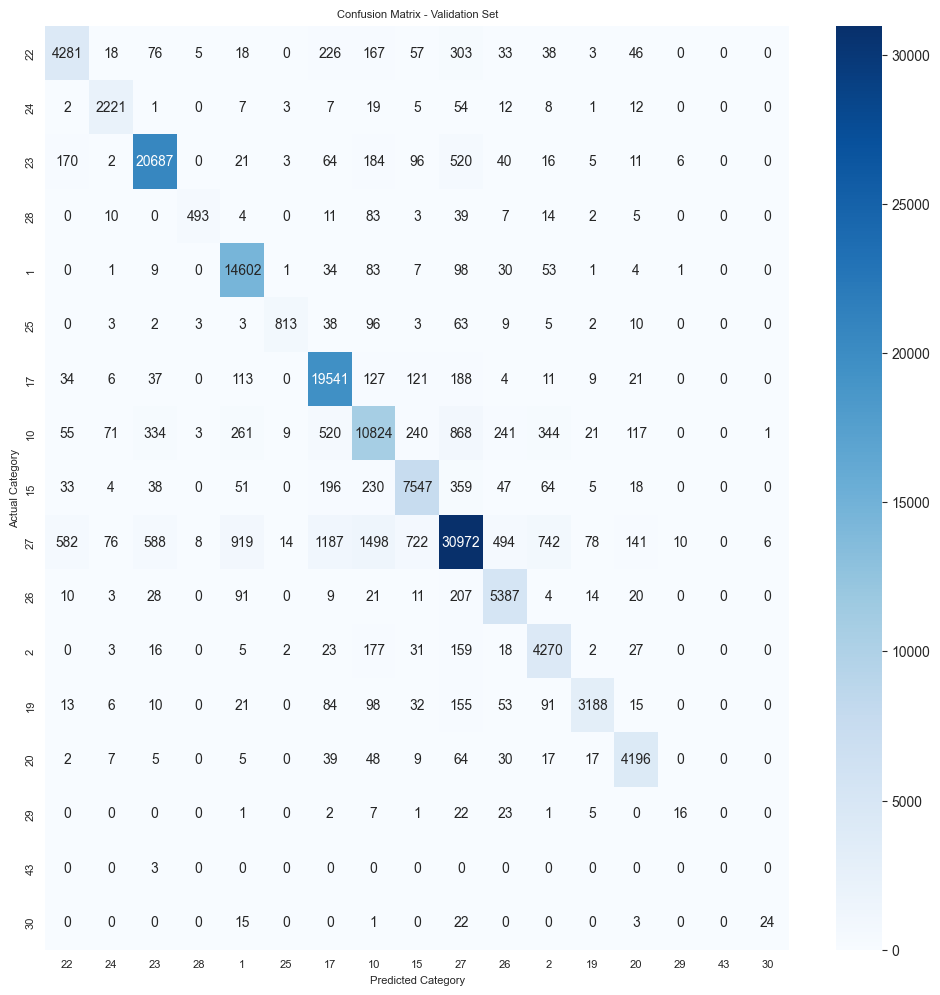

In [23]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'category' is the column containing your category labels in new_video_df
categories = new_video_df['Category_ID'].unique()

# Create a label encoder to map category labels to numerical IDs
label_encoder = LabelEncoder()
label_encoder.fit(categories)

# Map category labels to numerical IDs for Y_val and predicted_val
Y_val_mapped = label_encoder.transform(Y_val)
predicted_val_mapped = label_encoder.transform(predicted_val)

# Create and plot confusion matrix for the validation set
conf_matrix_val = confusion_matrix(Y_val_mapped, predicted_val_mapped)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Confusion Matrix - Validation Set', fontsize=8)
plt.xlabel('Predicted Category', fontsize=8)
plt.ylabel('Actual Category', fontsize=8)
plt.show()

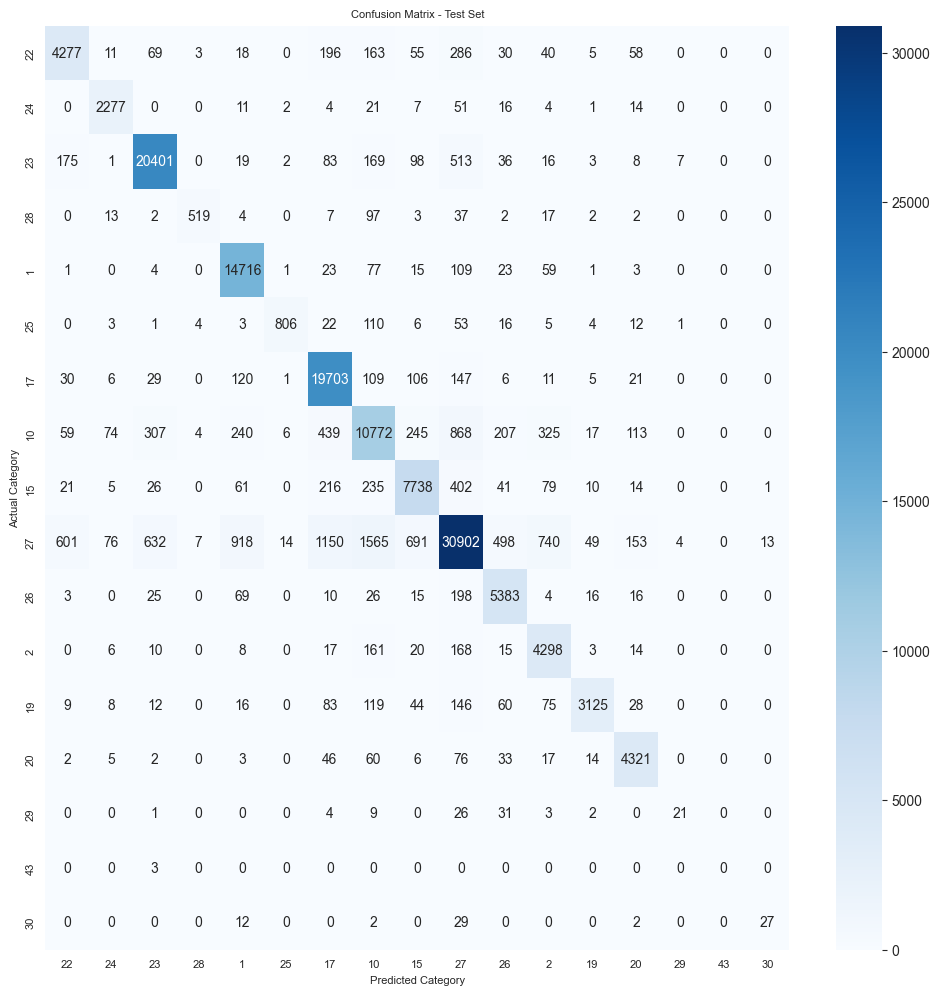

In [24]:
# Map category labels to numerical IDs for Y_test and predicted_test
Y_test_mapped = label_encoder.transform(Y_test)
predicted_test_mapped = label_encoder.transform(predicted_test)

# Create and plot confusion matrix for the test set
conf_matrix_test = confusion_matrix(Y_test_mapped, predicted_test_mapped)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Confusion Matrix - Test Set', fontsize=8)
plt.xlabel('Predicted Category', fontsize=8)
plt.ylabel('Actual Category', fontsize=8)
plt.show()

In [25]:
# Saving the trained Multinomial NB model to a file
model_filename = "nb_classifier_new.joblib"
dump(nb_classifier, model_filename)

# Saving the CountVectorizer to a file
vectorizer_filename = "CountVectorizer_new.joblib"
dump(vectorizer, vectorizer_filename)

['CountVectorizer_new.joblib']